In [1]:
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import utils
from scipy.optimize import minimize
import numpy as np

## Reading in Data

In [2]:
# Readin the dataframe and converting strings to dates and floats
btc_df = pd.read_csv("Data.csv", index_col=0, parse_dates=True)
btc_df["price"] = btc_df["price"].str.replace(",", "").astype(float)
btc_ar = btc_df.values

## First Autoregressive Model Experiment

Here we'll try to model the future price based on two days; one from a week ago and one from a month ago.

In [25]:
def build_guess_column(params, df, shifts, col_name="price", est_name="estimation_column"):
    """
    Adds a new column to the input dataframe that builds the estimated values out of linear transformations of shifted columns.
    """
    df = df.copy()
    df[est_name] = sum([params[i] * df[col_name].shift(shift) for i, shift in enumerate(shifts)])
    return df

In [26]:
def compute_loss(params, df, shifts, col_name="price", est_name="estimation_column"):
    """
    Computes the loss for a guess. Uses mean-squares as the loss function.
    """
    est_df = build_guess_column(params, df, shifts, col_name=col_name, est_name=est_name)
    diff = (est_df[col_name] - est_df[est_name])**2
    return diff.sum()

Optimal exposures: [ 9.53385687e-01  6.82449627e-02 -1.50671322e-03 -5.16621985e-03
  1.75125309e-02 -3.09286780e-02 -1.86903966e-02 -3.24700272e-02
  8.46647538e-02 -1.35295561e-02  6.37626654e-03 -6.88302003e-02
  8.39095911e-02 -2.20914387e-02 -4.39539098e-02 -1.24194487e-02
  5.17106814e-02 -2.97762111e-02 -2.49854813e-02  2.23609581e-02
  2.30985422e-02 -1.36846795e-02 -2.99441057e-02  8.16402257e-02
  9.69958140e-03 -3.64848717e-02  4.02417044e-02  6.73121928e-03
 -9.08642788e-02  5.21207049e-03  5.65549142e-02 -4.92009126e-02
  7.44838926e-02 -6.99410270e-02 -5.61857874e-04 -3.67463527e-02
  5.51121321e-02 -5.16120825e-02  4.26739711e-02  6.57333999e-02
 -8.92910391e-02  1.48378044e-02  5.65284838e-02  5.11805769e-04
 -8.72672090e-02 -1.03144740e-02  4.99213491e-02 -5.11281768e-04
 -4.60282378e-04]
Optimal loss:      2523774632.8416357


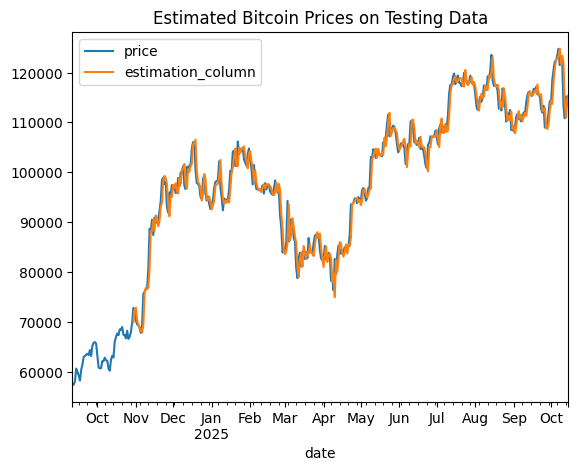

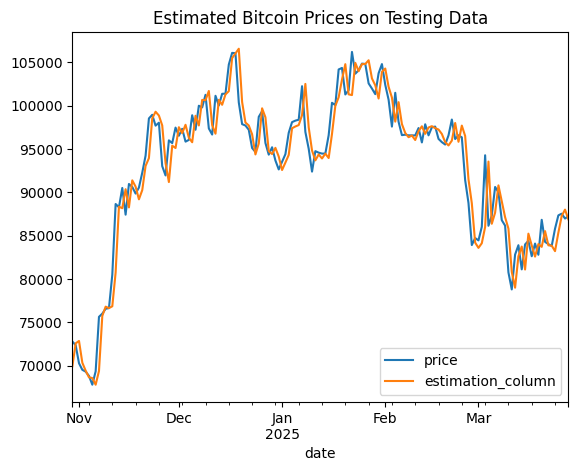

In [75]:
# Making a train-test split
n = len(btc_df)
btc_df_train, btc_df_test = btc_df.iloc[:int(0.8*n)], btc_df.iloc[int(0.8*n):]

# Training the coefficients
shifts = list(range(1, 50, 1))
x0 = [1 for _ in range(len(shifts))]
result = minimize(compute_loss, x0, args=(btc_df_train, shifts))

print(f"Optimal exposures: {result.x}")
print(f"Optimal loss:      {result.fun}")

# Graphing the daily guesses
params = result.x

est_df = build_guess_column(params, btc_df_test, shifts)
est_df.plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

est_df.iloc[max(shifts):max(shifts) + 150].plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

## Experimenting on daily returns instead of daily prices

In [ ]:
# Making a returns df
ret_df = 

# Making a train-test split
n = len(btc_df)
btc_df_train, btc_df_test = btc_df.iloc[:int(0.8*n)], btc_df.iloc[int(0.8*n):]

# Training the coefficients
shifts = list(range(1, 50, 1))
x0 = [1 for _ in range(len(shifts))]
result = minimize(compute_loss, x0, args=(btc_df_train, shifts))

print(f"Optimal exposures: {result.x}")
print(f"Optimal loss:      {result.fun}")

# Graphing the daily guesses
params = result.x

est_df = build_guess_column(params, btc_df_test, shifts)
est_df.plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

est_df.iloc[max(shifts):max(shifts) + 150].plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

test indices again

In paper mention off by one error things